---

## 12.2 DeepDream

In [1]:
import os, pathlib
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import YouTubeVideo

import tensorflow as tf

In [2]:
# reminder: Colab code to mount your drive
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/IS53024B-Artificial-Intelligence/8-generative-deep-learning') # 'My Drive' is the default name of Google Drives,
    os.listdir() 

DeepDream was released by Google in 2015.

It is an algorithm to produce trippy pictures with [pareidolic](https://en.wikipedia.org/wiki/Pareidolia) effects (= meaningful patterns where there is none), such as animals, faces, or simply pattern emerging from any image... 

This exploits the inner representation of the ConvNet used, for instance ImageNet, which is replete with animal pictures!

#### Reference

["Inceptionism: Going Deeper into Neural Networks"](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)

<!-- ![Google DeepDream: Ibis](images/google.deepdream.ibis.png) -->
![Google DeepDream: Ibis](https://drive.google.com/uc?id=1cdjdCet_AF05SMcVu2a6iN0nCBaD1uyy)

<small>["Inceptionism: Going Deeper into Neural Networks"](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)</small>


<!-- ![Google DeepDream: Ibis](images/google.deepdream.building-dreams.png) -->
![Google DeepDream: Ibis](https://drive.google.com/uc?id=1_PmAAvK4mxF9Uo4vM5FxnX716XlBQzXR)

<small>["Inceptionism: Going Deeper into Neural Networks"](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)</small>


The DeepDream algorithm follows the convnet filter visualisation technique we saw in topic 5.

We kept the net fixed and **learnt the image**.

More specifically, we used **gradient ascent on the input image** in order to **maximise** the response of a specific filter in an upper layer.

In this case :

- DeepDream mixes the influence of a large number of features by **maximising the activation of entire layers** rather than a specific filter;
- We **start with an existing image**, not an image of random pixel values, so that the algorithm works with/on pre-existing visual patterns;
- The creators used a scheme with **successive upscalings ("octaves")** of the input image.

---

### 12.2.1 Implementing DeepDream in Keras

**Fetching the test image**

156176/156176 [==============================] - 0s 0us/step


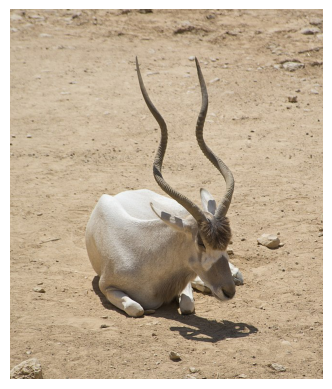

In [36]:
basedir = pathlib.Path("deep-dream")
if not basedir.is_dir():
    os.mkdir("deep-dream")
    
base_image_path = tf.keras.utils.get_file(
    # "coast.jpg",
    # origin="https://img-datasets.s3.amazonaws.com/coast.jpg",
    # "labrador.jpg", # https://www.tensorflow.org/tutorials/generative/deepdream
    # origin="https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg",
    "addax.jpg",
    origin="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Addax-Jerusalem-Biblical-Zoo-IZE-611.jpg/649px-Addax-Jerusalem-Biblical-Zoo-IZE-611.jpg",
    cache_dir=basedir,
    cache_subdir="",    
)

plt.axis("off")
plt.imshow(tf.keras.utils.load_img(base_image_path))

**Instantiating a pretrained `InceptionV3` model**

The Keras [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3)

<!-- <img style="float:right" src="images/inceptionv3onc--overview.png"> -->
<img style="float:right" src="https://drive.google.com/uc?id=1IyQ07lBnkROv9sWUjZMx57C4ncl1tJhz">

<small style="position:absolute;right:0;bottom:0">[Advanced Guide to Inception v3](https://cloud.google.com/tpu/docs/inception-v3-advanced)</small>



In [2]:
model = tf.keras.applications.inception_v3.InceptionV3(weights="imagenet", include_top=False)

In [3]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

 batch_normalization_71 (BatchN  (None, None, None,   960        ['conv2d_71[0][0]']              
 ormalization)                  320)                                                              
                                                                                                  
 batch_normalization_75 (BatchN  (None, None, None,   576        ['conv2d_75[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_71 (Activation)     (None, None, None,   0           ['batch_normalization_71[0][0]'] 
                                320)                                                              
                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
          

                                384)                                                              
                                                                                                  
 activation_79 (Activation)     (None, None, None,   0           ['batch_normalization_79[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_82 (Activation)     (None, None, None,   0           ['batch_normalization_82[0][0]'] 
                                384)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
                                384)                                                              
          

 ormalization)                  384)                                                              
                                                                                                  
 batch_normalization_92 (BatchN  (None, None, None,   1152       ['conv2d_92[0][0]']              
 ormalization)                  384)                                                              
                                                                                                  
 conv2d_93 (Conv2D)             (None, None, None,   393216      ['average_pooling2d_8[0][0]']    
                                192)                                                              
                                                                                                  
 batch_normalization_85 (BatchN  (None, None, None,   960        ['conv2d_85[0][0]']              
 ormalization)                  320)                                                              
          

**Configuring the contribution of each layer to the DeepDream loss**

In [7]:
layer_settings = {  # The names of the layers we will be using
    "mixed4": 1.0,  # as well as their respective weight/importance
    "mixed5": 1.5,  # (how much their reaction counts) in the mix
    "mixed6": 2.0,  # TWEAK ME! (use the summary to get the layer names!)
    "mixed7": 2.5,
}

outputs_dict = dict(
    [                                          # we define a new model yielding a dictionary with
        (layer.name, layer.output)             # {"layer name": layer output, ... }
        for layer in [
            model.get_layer(name)              # for all layers selected in `layer_settings`
            for name in layer_settings.keys()
        ]
    ]
)
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=outputs_dict) # functional syntax: our new model

```python
# we can run our image through the feature extractor and get the layer responses
features = feature_extractor(img)
```

### The DeepDream loss

Like previously, in filter visualisation, we use **gradient ascent** on our input to **learn the image**.

#### Workflow

1. Select the layers we want;
2. Create a new network that return their activations;
3. Run the image through the new network;
4. Take the gradients of the image w.r.t. the activations;
5. Modify the image using said gradients.

The only difference with our earlier visualisation example is that instead of one filter, DeepDream maximises the activation of **all filters in a number of layers simultaneously**.

### The DeepDream loss


How do we maximize the activations?

We take **the squared norm of each activations** (= an average of how excited it has been), and then take **a weighted sum of all of those** (the numbers above!).

#### Notes

Here we use set of **high-level layers**: lower layers produce in geometric patterns, higher layers produce **recognisable features** from ImageNet classes (e.g. animals, objects, etc.).

The exact set of layers has a large influence on the result: it's a **hyperparameter**.



In [9]:
def compute_loss(input_image):
    features = feature_extractor(input_image)                                   # 1. run image through network 
    loss = tf.zeros(shape=())                                                   #    (to get activations)
    for name in features.keys():                                                # 2. for each layer/activation:
        coeff = layer_settings[name]                                            #       extract coefficient (→ weight)
        activation = features[name]                                             #       extract the activation
        loss += coeff * tf.reduce_mean(tf.square(activation[:, 2:-2, 2:-2, :])) # 3. squared norm
    return loss                                              # ↑ remove border pixels to avoid odd effects


**The DeepDream gradient ascent process**

In [10]:
@tf.function
def gradient_ascent_step(image, learning_rate):   # GRADIENT COMPUTATION
    with tf.GradientTape() as tape:               # 1. start the operation-tracking
        tape.watch(image)                         #    & watch the image
        loss = compute_loss(image)                # 2. compute the loss (of the image w.r.t. our layers)
    grads = tape.gradient(loss, image)            # 3. compute the gradients
    grads = tf.math.l2_normalize(grads)           #    (trick: l2 normalise the gradients!)
    image += learning_rate * grads                # 4. modify the image (add learning_rate * gradients)
    return loss, image


def gradient_ascent_loop(image, iterations, learning_rate, max_loss=None): # 'TRAINING' LOOP
    for i in range(iterations):                                            # For a number of steps 
        loss, image = gradient_ascent_step(image, learning_rate)           #     modify the image using the gradient
        if max_loss is not None and loss > max_loss:                       #     (cut-off mechanism above
            break                                                          #     a certain loss)
        print(f"... Loss value at step {i+1}: {loss:.2f}\r", end="")
    print()
    return image

### Octaves

An additional mechanism the authors implemented: repeat the process at different scales.

#### Workflow

1. Define a list of processing **scales** (also called **octaves**).  
   Each successive **scale** is 40% larger than previous one. That percentage is a **hyperparameter**!
2. Run gradient ascent (*learn the image*) on each successive scale.
3. Reinject the original image at each step (for stability: like a **residual layer**!).

![deep dream process](https://s3.amazonaws.com/book.keras.io/img/ch8/deepdream_process.png)

**Image processing utilities**

In [18]:
def preprocess_image(image_path):
    img = tf.keras.utils.load_img(image_path)                      # load
    img = tf.keras.utils.img_to_array(img)                         # turn into array
    img = np.expand_dims(img, axis=0)                              # add batch dimension
    img = tf.keras.applications.inception_v3.preprocess_input(img) # rescaling to make it compatible with the net
    return img

def deprocess_image(img):
    img = tf.reshape(img, (img.shape[1], img.shape[2], 3))         # remove batch dim
    img /= 2.0                                                     # denormalisation:
    img += 0.5                                                     # Inception has pixels in [-1, 1]:
    img *= 255.                                                    # retransform back to [0,255]
    img = np.clip(img, 0, 255).astype("uint8")
    return img

**Running gradient ascent over multiple successive "octaves"**

Successive shapes:
    - (682, 576)
    - (702, 593)
    - (723, 611)
    - (745, 630)
    - (768, 649)
----------------------------------------
Processing octave 0 with shape (682, 576)
... Loss value at step 10: 3.61

Processing octave 1 with shape (702, 593)
... Loss value at step 10: 6.18

Processing octave 2 with shape (723, 611)
... Loss value at step 10: 8.52

Processing octave 3 with shape (745, 630)
... Loss value at step 10: 10.49

Processing octave 4 with shape (768, 649)
... Loss value at step 10: 12.73



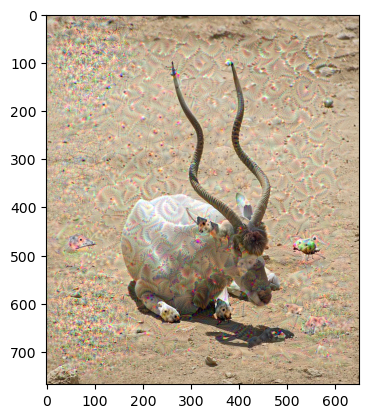

In [97]:
# Tweak me! ---------------
                     # Chollet:
step = 25.           # 20.  # ← this is the learning rate!
num_octave = 5       # 3
octave_scale = 1.03  # 1.4
iterations = 10      # 30
max_loss = 15.       # 15.  # a cut-off point for our loss

# -----------------------------------------------------------------

original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape]                                           # 'OCTAVES'
for i in range(1, num_octave):                                                 # prepare the shapes in advance,
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])  # going from largest to smallest
    successive_shapes.append(shape) # ↑ we divide by the scale i times
successive_shapes = successive_shapes[::-1]                                    # then reverse the order

print("Successive shapes:")
print(*[f"    - {sh}" for sh in successive_shapes], sep="\n")
print("-" * 40)

shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])      # START: resize to smallest

img = tf.identity(original_img) # just a copy
for i, shape in enumerate(successive_shapes):                                  # DREAM
    print(f"Processing octave {i} with shape {shape}")
    img = tf.image.resize(img, shape)                                          # 1. resize
    img = gradient_ascent_loop(                                                # 2. learn the image at this scale
        img, iterations=iterations, learning_rate=step, max_loss=max_loss
    )
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape) # 3. lost detail: the difference
    same_size_original = tf.image.resize(original_img, shape)                  #    between the downscaled original
    lost_detail = same_size_original - upscaled_shrunk_original_img            #    & the upscaled shrunk original
    img += lost_detail                                                         #    readded to our dream
    shrunk_original_img = tf.image.resize(original_img, shape)                 #    (prepare shrunk for next loop)
    print()

tf.keras.utils.save_img(basedir/"dream.png", deprocess_image(img.numpy()))
plt.imshow(deprocess_image(img))


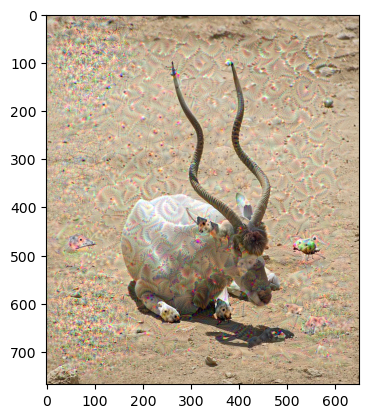

In [98]:
plt.imshow(tf.keras.utils.load_img(basedir/"dream.png"))

### More

An online tool for DeepDream: [deepdreamgenerator.com](https://deepdreamgenerator.com/).

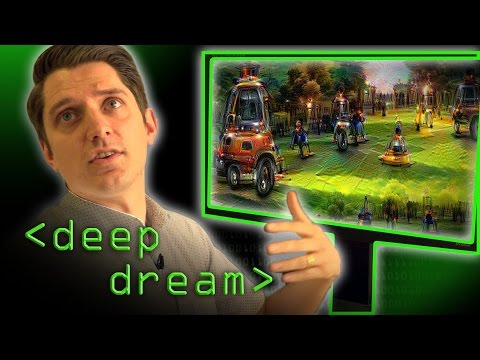

In [2]:
YouTubeVideo('BsSmBPmPeYQ', width=853, height=480) # Deep Dream (Google) - Computerphile

### Experiments

- Tweak various **layers**:
    - lower layers produce **geometric patterns**;
    - upper layers are more **specific** (noses, feathers, eyes etc.)
      
- Try **different convnets** (for a variety of learned features), `Keras` has many on offer:
    - VGG16;
    - VGG19;
    - Xception;
    - ResNet50... 
    
The [List of `tf.keras.applications` models](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

### Furher experiments

- Save and visualise images at **intermediate steps **and test the different parameters to see what each one is doing.
- Run **grid/random search** on the parameters;
- Create an interactive framework that could run one step, with options to redo the step with different parameters, or undo and go back to the previous stage (= **babysitting**).

---

### 12.2.2 Wrapping up

- DeepDream runs a convnet **in reverse** (**learns the image**) to generate psychedelic images based on learned representations;
- The process is not specific to convnets or even to images (it could theoretically be done with speech, music...) since it merely attempts to increase the activation of layers by **gradient ascent**.